In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

In [27]:
dataset = pd.read_csv("/content/drive/MyDrive/RansomwareProject/Datasets/transformed_train_df.csv")
print("Original dataset size: ",dataset.shape)

percent_data_set = 100

dataset['Label'], uniques = pd.factorize(dataset['Label'])
# print(dataset.head())
sampled_df = dataset.groupby('Label').apply(lambda x: x.sample(frac=percent_data_set/100, random_state=42)).reset_index(drop=True)
print("Sampled dataset size: ",sampled_df.shape)

print(f"Number of unique values in the 'Label' column: {dataset['Label'].nunique()}")

Original dataset size:  (313627, 21)
Sampled dataset size:  (313627, 21)
Number of unique values in the 'Label' column: 11


<ipython-input-27-2f0d2c26c92d>:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_df = dataset.groupby('Label').apply(lambda x: x.sample(frac=percent_data_set/100, random_state=42)).reset_index(drop=True)


In [28]:
# split the dataset
X_train = sampled_df.iloc[:,:20]
Y_train = sampled_df["Label"]
print("Sampled X size: ",X_train.shape)
print("Sampled Y size: ",Y_train.shape)

print("Sampled X head: ",X_train.head())
print("Sampled Y head: ",Y_train.head())

X_train = X_train.to_numpy()
Y_train = Y_train.to_numpy()

Sampled X size:  (313627, 20)
Sampled Y size:  (313627,)
Sampled X head:     FAMD_Component_1  FAMD_Component_2  FAMD_Component_3  FAMD_Component_4  \
0          1.106166         -1.091306          7.027377          4.311347   
1          0.954526         -1.033375         -0.491732         -1.109583   
2          0.643954         -1.227613         -5.401073         -3.618718   
3          1.094598         -1.110412         -1.769525         -2.175249   
4          1.108363         -1.127580         -1.382770         -1.992035   

   FAMD_Component_5  FAMD_Component_6  FAMD_Component_7  FAMD_Component_8  \
0         -1.536011          5.063335          1.261412         -6.509035   
1         -0.145088         -2.437912         -1.213178         -0.716131   
2         -5.784012          4.060536          1.793040          0.950605   
3         -2.229234         -2.066392         -1.881398         -1.683342   
4         -2.401953         -1.963375         -2.065242         -1.428270   



In [29]:
# lets make our NN model layers
np.random.seed(42)
tf.random.set_seed(42)
num_samples = 15000
num_features = 20
num_classes = 11
noOfEpochs=5
learningRate = 0.01

model = Sequential([
    Dense(1024, activation='relu', input_shape=(num_features,)),  # Input Layer
    Dense(512, activation='relu'),  # Hidden Layer 1
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),# Hidden Layer 2
    Dense(num_classes, activation='softmax')  # Output Layer
])

model.compile(
    optimizer='adam',  # Adaptive Moment Estimation optimizer
    loss='sparse_categorical_crossentropy',  # Suitable for multi-class classification
    metrics=['accuracy']  # Tracking accuracy during training
)

model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ (None, 1024)                │          21,504 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 11)                  │           1,419 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 711,947 (2.72 MB)

 Trainable params: 711,947 (2.72 MB)

 Non-trainable params: 0 (0.00 B)

In [34]:
Training the model
history = model.fit(
    X_train, Y_train,
    epochs=30,  # Number of training epochs
    batch_size=32,  # Mini-batch size
    verbose=1  # Display training progress
)
history1 = model.fit(
    X_train, Y_train,
    epochs=20,  # Number of training epochs
    batch_size=32,  # Mini-batch size
    verbose=1  # Display training progress
)


Epoch 1/20
9801/9801 ━━━━━━━━━━━━━━━━━━━━ 150s 15ms/step - accuracy: 0.2177 - loss: 2.0751
Epoch 2/20
9801/9801 ━━━━━━━━━━━━━━━━━━━━ 149s 15ms/step - accuracy: 0.2163 - loss: 2.0787
Epoch 3/20
9801/9801 ━━━━━━━━━━━━━━━━━━━━ 202s 15ms/step - accuracy: 0.2165 - loss: 2.0777
Epoch 4/20
9801/9801 ━━━━━━━━━━━━━━━━━━━━ 150s 15ms/step - accuracy: 0.2157 - loss: 2.3818
Epoch 5/20
9801/9801 ━━━━━━━━━━━━━━━━━━━━ 197s 15ms/step - accuracy: 0.2156 - loss: 2.0759
Epoch 6/20
9801/9801 ━━━━━━━━━━━━━━━━━━━━ 204s 15ms/step - accuracy: 0.2136 - loss: 2.0791
Epoch 7/20
9801/9801 ━━━━━━━━━━━━━━━━━━━━ 200s 15ms/step - accuracy: 0.2146 - loss: 2.1038
Epoch 8/20
9801/9801 ━━━━━━━━━━━━━━━━━━━━ 149s 15ms/step - accuracy: 0.2174 - loss: 2.0763
Epoch 9/20
9801/9801 ━━━━━━━━━━━━━━━━━━━━ 149s 15ms/step - accuracy: 0.2178 - loss: 2.0797
Epoch 10/20
9801/9801 ━━━━━━━━━━━━━━━━━━━━ 152s 16ms/step - accuracy: 0.2183 - loss: 2.0719
Epoch 11/20
9801/9801 ━━━━━━━━━━━━━━━━━━━━ 150s 15ms/step - accuracy: 0.2181 - loss: 2.07

KeyboardInterrupt: 

In [ ]:
# Plot loss

plt.plot(history.history['loss'], label='Training Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

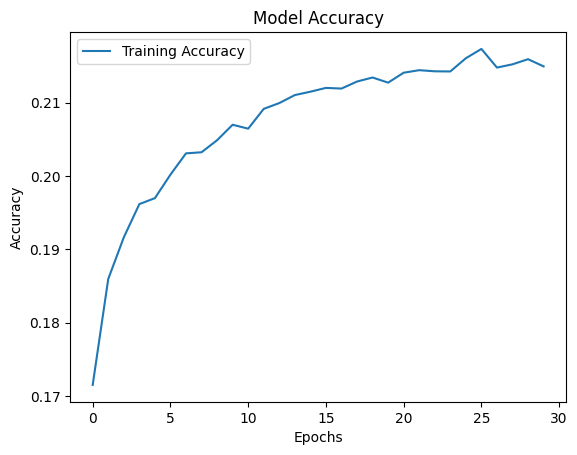

In [32]:
# Plot accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
# plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [33]:
# Save the entire model
model.save('/content/drive/MyDrive/RansomwareProject/models/100_30.h5')  # Save as HDF5 file
